1. WHAT ARE THE FACTORS THAT INFLUENCE CALORIES IN OVER 1000 COMMONLY EATEN FOODS?

From data.gov website: MyPyramid Food Data provides information on the total calories; calories from solid fats, added sugars, and alcohol (extras); MyPyramid food group and subgroup amounts; and saturated fat content of over 1,000 commonly eaten foods with corresponding commonly used portion amounts. This information is key to help consumers meet the recommendations of the Dietary Guidelines for Americans and manage their weight by understanding how many calories are consumed from "extras." https://catalog.data.gov/dataset/mypyramid-food-raw-data-f9ed6


In [1]:
# Basics

import pandas as pd
import numpy as np

# Visualization 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Sampling // Classifer // Metrics 

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

BRING IN THE DATA

In [2]:
#load csv file data with headers

location = "Food_Display_Table.csv"
df = pd.read_csv(location)

In [3]:
df.head()
#df.head

,Food_Code,Display_Name,Portion_Default,Portion_Amount,Portion_Display_Name,Factor,Increment,Multiplier,Grains,Whole_Grains,...,Milk,Meats,Soy,Drybeans_Peas,Oils,Solid_Fats,Added_Sugars,Alcohol,Calories,Saturated_Fats
0,12350000,Sour cream dip,1,0.25,cup,0.25,0.25,1.00,0.04799,0.0,...,0.00000,0.0000,0.0,0.0,0.0,105.64850,1.57001,0.0,133.65,7.36898
1,13110100,"Ice cream, regular",1,1.00,cup,1.00,0.25,0.25,0.00000,0.0,...,0.29393,0.0000,0.0,0.0,0.0,130.99968,95.20488,0.0,267.33,9.03070
2,13110120,"Ice cream, rich",1,1.00,cup,1.00,0.25,0.25,0.00000,0.0,...,0.25160,0.0962,0.0,0.0,0.0,213.06672,96.10340,0.0,368.52,15.28840
3,13110200,Soft serve ice cream,1,1.00,cup,1.00,0.25,0.25,0.00000,0.0,...,0.38233,0.0000,0.0,0.0,0.0,170.39808,123.83793,0.0,347.73,11.74670
4,13120100,"Ice cream bar, chocolate covered",1,1.00,bar (bar = 3 fl oz),1.00,0.50,0.50,0.00000,0.0,...,0.09744,0.0000,0.0,0.0,0.0,112.32144,45.54761,0.0,169.12,9.58720


EXPLORE DATA PROPERTIES

In [4]:
# overview of variable information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 26 columns):
Food_Code               2014 non-null int64
Display_Name            2014 non-null object
Portion_Default         2014 non-null int64
Portion_Amount          2014 non-null float64
Portion_Display_Name    2014 non-null object
Factor                  2011 non-null float64
Increment               2014 non-null float64
Multiplier              2014 non-null float64
Grains                  2014 non-null float64
Whole_Grains            2014 non-null float64
Vegetables              2014 non-null float64
Orange_Vegetables       2014 non-null float64
Drkgreen_Vegetables     2014 non-null float64
Starchy_vegetables      2014 non-null float64
Other_Vegetables        2014 non-null float64
Fruits                  2014 non-null float64
Milk                    2014 non-null float64
Meats                   2014 non-null float64
Soy                     2014 non-null float64
Drybeans_Peas           2

In [6]:
# show the number of rows and number of columns
df.shape

(2014, 26)

In [7]:
#show the column names in the dataset
df.columns

Index(['Food_Code', 'Display_Name', 'Portion_Default', 'Portion_Amount',
       'Portion_Display_Name', 'Factor', 'Increment', 'Multiplier', 'Grains',
       'Whole_Grains', 'Vegetables', 'Orange_Vegetables',
       'Drkgreen_Vegetables', 'Starchy_vegetables', 'Other_Vegetables',
       'Fruits', 'Milk', 'Meats', 'Soy', 'Drybeans_Peas', 'Oils', 'Solid_Fats',
       'Added_Sugars', 'Alcohol', 'Calories', 'Saturated_Fats'],
      dtype='object')

In [5]:
# show numeric variables
df.describe()

,Food_Code,Portion_Default,Portion_Amount,Factor,Increment,Multiplier,Grains,Whole_Grains,Vegetables,Orange_Vegetables,...,Milk,Meats,Soy,Drybeans_Peas,Oils,Solid_Fats,Added_Sugars,Alcohol,Calories,Saturated_Fats
count,2.014000e+03,2014.000000,2014.000000,2011.000000,2014.000000,2014.000000,2014.000000,2014.00000,2014.000000,2014.000000,...,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000
mean,5.296170e+07,1.496524,1.204692,1.132641,0.560824,0.575141,0.504492,0.04808,0.105452,0.007463,...,0.084166,0.639183,0.013808,0.006022,0.298861,32.303659,15.814046,2.824970,154.371355,2.133676
std,2.454156e+07,0.500112,1.479900,1.319820,0.419234,0.257787,0.958157,0.27169,0.241636,0.056046,...,0.244766,1.244475,0.140858,0.049639,0.854971,59.695224,40.935629,21.552392,146.052006,3.299764
min,7.258000e+03,1.000000,0.250000,0.060000,0.250000,0.100000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.721410e+07,1.000000,1.000000,1.000000,0.250000,0.500000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.437500,0.081375
50%,5.440309e+07,1.000000,1.000000,1.000000,0.500000,0.500000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.072600,0.000000,0.000000,115.380000,0.859000
75%,7.290128e+07,2.000000,1.000000,1.000000,0.500000,0.500000,0.687085,0.00000,0.038578,0.000000,...,0.000000,0.730650,0.000000,0.000000,0.037075,41.460480,10.358490,0.000000,208.794000,2.853925
max,9.421010e+07,2.000000,20.000000,20.000000,5.000000,1.000000,8.291140,5.03826,3.444000,1.000640,...,2.605680,10.657800,2.504170,0.612900,12.111110,719.607780,569.818430,325.369800,1667.400000,36.786600


In [ ]:
EXPLORE DATA RELATIONSHIPS

In [18]:
datatest.loc['Calories'] 

Food_Code             -0.165640
Portion_Default        0.025193
Portion_Amount        -0.018401
Factor                 0.021941
Increment             -0.175976
Multiplier            -0.259103
Grains                 0.590093
Whole_Grains           0.044091
Vegetables             0.215089
Orange_Vegetables      0.024615
Drkgreen_Vegetables   -0.038741
Starchy_vegetables     0.157267
Other_Vegetables       0.160183
Fruits                -0.048194
Milk                   0.370700
Meats                  0.431031
Soy                   -0.023314
Drybeans_Peas          0.098661
Oils                   0.278685
Solid_Fats             0.745669
Added_Sugars           0.243772
Alcohol                0.044321
Calories               1.000000
Saturated_Fats         0.797405
Name: Calories, dtype: float64

In [10]:
#Find correlations between all the variables 
df.corr()

,Food_Code,Portion_Default,Portion_Amount,Factor,Increment,Multiplier,Grains,Whole_Grains,Vegetables,Orange_Vegetables,...,Milk,Meats,Soy,Drybeans_Peas,Oils,Solid_Fats,Added_Sugars,Alcohol,Calories,Saturated_Fats
Food_Code,1.000000,0.038361,-0.042964,-0.054667,0.004142,0.089028,-0.058433,0.007957,0.180355,0.043655,...,-0.152803,-0.505314,-0.073732,-0.023788,0.062740,-0.151795,0.200710,0.215772,-0.165640,-0.186241
Portion_Default,0.038361,1.000000,0.176902,0.156580,0.213660,0.137469,0.017086,-0.018593,-0.067832,-0.046285,...,-0.034511,0.058467,-0.046512,-0.071710,0.004098,0.027605,0.033334,0.016270,0.025193,0.022077
Portion_Amount,-0.042964,0.176902,1.000000,0.803041,0.706804,-0.359310,-0.061215,-0.019810,-0.010310,-0.038222,...,0.034705,0.084732,-0.010715,-0.035249,-0.054413,-0.034347,-0.042687,0.112408,-0.018401,-0.040976
Factor,-0.054667,0.156580,0.803041,1.000000,0.427489,-0.345697,-0.059775,-0.017312,-0.031098,-0.035536,...,0.044527,0.124969,-0.004087,-0.032923,-0.068338,-0.033472,-0.008645,0.248259,0.021941,-0.028186
Increment,0.004142,0.213660,0.706804,0.427489,1.000000,0.180971,-0.113859,-0.067845,-0.105164,-0.073028,...,-0.093048,-0.002799,-0.030844,-0.052046,-0.112745,-0.073034,-0.094904,0.036853,-0.175976,-0.114497
Multiplier,0.089028,0.137469,-0.359310,-0.345697,0.180971,1.000000,-0.120947,-0.118524,-0.138683,-0.069190,...,-0.107954,-0.167891,-0.000270,-0.034078,-0.002380,-0.068143,-0.078872,-0.083963,-0.259103,-0.092082
Grains,-0.058433,0.017086,-0.061215,-0.059775,-0.113859,-0.120947,1.000000,0.277748,0.097293,-0.001965,...,0.271040,-0.018251,-0.043097,0.031822,0.093903,0.364156,-0.004773,-0.069048,0.590093,0.324367
Whole_Grains,0.007957,-0.018593,-0.019810,-0.017312,-0.067845,-0.118524,0.277748,1.000000,-0.073838,-0.023031,...,-0.060290,-0.088035,-0.017259,-0.021297,0.027415,-0.072538,-0.011311,-0.023207,0.044091,-0.069844
Vegetables,0.180355,-0.067832,-0.010310,-0.031098,-0.105164,-0.138683,0.097293,-0.073838,1.000000,0.271111,...,0.156907,-0.072624,-0.030248,0.008135,0.023103,0.170199,-0.139440,-0.044024,0.215089,0.131378
Orange_Vegetables,0.043655,-0.046285,-0.038222,-0.035536,-0.073028,-0.069190,-0.001965,-0.023031,0.271111,1.000000,...,-0.031948,-0.016338,-0.012079,0.010897,-0.006719,0.008249,-0.019530,-0.017463,0.024615,-0.006489


EXPLORE DATA THROUGH VISUALIZATIONS 

C:\Users\Edel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


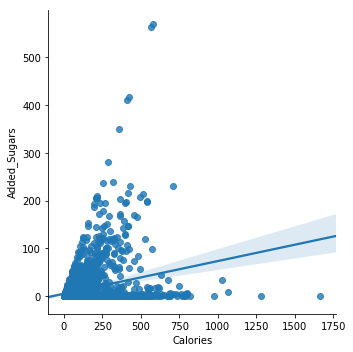

In [15]:
#make a scatterplot
sns.lmplot(x='Calories', y='Added_Sugars', data=df)

C:\Users\Edel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


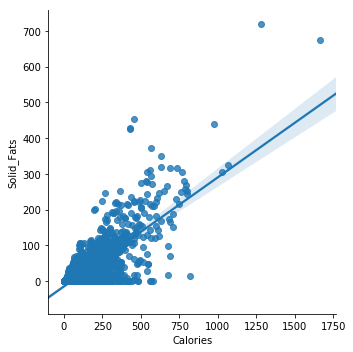

In [46]:
#make a scatterplot
sns.lmplot(x='Calories', y='Solid_Fats', data=df)

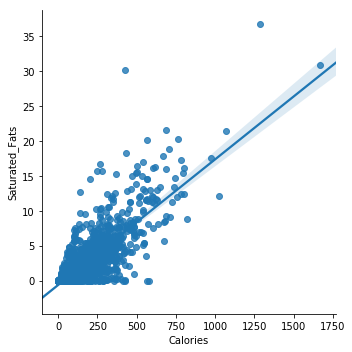

In [47]:
#make a scatterplot
sns.lmplot(x='Calories', y='Saturated_Fats', data=df)

CLEAN UP THE DATA 

In [12]:
#find missing values
filename = "Food_Display_Table.csv"
df_missing = pd.read_csv(filename)
#df.head(


In [13]:
#show missing values
df_missing.isnull().sum()

Food_Code               0
Display_Name            0
Portion_Default         0
Portion_Amount          0
Portion_Display_Name    0
Factor                  3
Increment               0
Multiplier              0
Grains                  0
Whole_Grains            0
Vegetables              0
Orange_Vegetables       0
Drkgreen_Vegetables     0
Starchy_vegetables      0
Other_Vegetables        0
Fruits                  0
Milk                    0
Meats                   0
Soy                     0
Drybeans_Peas           0
Oils                    0
Solid_Fats              0
Added_Sugars            0
Alcohol                 0
Calories                0
Saturated_Fats          0
dtype: int64

In [14]:
df['Alcohol'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
Name: Alcohol, Length: 2014, dtype: float64>

In [15]:
#Drop Alcohol because all the values are 0. 
df.drop('Alcohol', axis=1)

,Food_Code,Display_Name,Portion_Default,Portion_Amount,Portion_Display_Name,Factor,Increment,Multiplier,Grains,Whole_Grains,...,Fruits,Milk,Meats,Soy,Drybeans_Peas,Oils,Solid_Fats,Added_Sugars,Calories,Saturated_Fats
0,12350000,Sour cream dip,1,0.25,cup,0.25,0.25,1.00,0.04799,0.00000,...,0.00000,0.00000,0.00000,0.0,0.0,0.00000,105.64850,1.57001,133.6500,7.36898
1,13110100,"Ice cream, regular",1,1.00,cup,1.00,0.25,0.25,0.00000,0.00000,...,0.00000,0.29393,0.00000,0.0,0.0,0.00000,130.99968,95.20488,267.3300,9.03070
2,13110120,"Ice cream, rich",1,1.00,cup,1.00,0.25,0.25,0.00000,0.00000,...,0.00000,0.25160,0.09620,0.0,0.0,0.00000,213.06672,96.10340,368.5200,15.28840
3,13110200,Soft serve ice cream,1,1.00,cup,1.00,0.25,0.25,0.00000,0.00000,...,0.00000,0.38233,0.00000,0.0,0.0,0.00000,170.39808,123.83793,347.7300,11.74670
4,13120100,"Ice cream bar, chocolate covered",1,1.00,bar (bar = 3 fl oz),1.00,0.50,0.50,0.00000,0.00000,...,0.00000,0.09744,0.00000,0.0,0.0,0.00000,112.32144,45.54761,169.1200,9.58720
5,13120100,"Ice cream bar, chocolate covered",2,1.00,Klondike Krispy bar,1.00,0.50,0.50,0.00000,0.00000,...,0.00000,0.16008,0.00000,0.0,0.0,0.00000,184.52808,74.82821,277.8400,15.75040
6,13120500,Ice cream sandwich,1,1.00,sandwich,1.00,0.50,0.50,0.53454,0.00000,...,0.00000,0.09912,0.00000,0.0,0.0,0.00000,49.46265,48.40002,143.3700,3.23320
7,13130300,Light ice cream,1,1.00,cup,1.00,0.25,0.25,0.00000,0.00000,...,0.00000,0.75980,0.00000,0.0,0.0,0.00000,45.60372,70.88353,216.1500,3.39290
8,13130600,Light soft serve ice cream,1,1.00,cup,1.00,0.25,0.25,0.00000,0.00000,...,0.00000,0.71750,0.00000,0.0,0.0,0.00000,39.65850,0.00000,220.5000,2.85250
9,13135000,Light ice cream sandwich,1,1.00,sandwich,1.00,0.50,0.50,0.54360,0.00000,...,0.00000,0.26520,0.00000,0.0,0.0,0.00000,21.21120,41.22339,129.6000,1.36800


In [22]:
#Create a new dataset without alcohol
df2=df.drop('Alcohol', axis=1)

CONDUCT ANALYSES OF VARIABLES

CORRELATION AND LINEAR REGRESSION MODELS

In [23]:
#Create a correlation table to determine which variables to include in regression 
df2.corr()

,Food_Code,Portion_Default,Portion_Amount,Factor,Increment,Multiplier,Grains,Whole_Grains,Vegetables,Orange_Vegetables,...,Fruits,Milk,Meats,Soy,Drybeans_Peas,Oils,Solid_Fats,Added_Sugars,Calories,Saturated_Fats
Food_Code,1.000000,0.038361,-0.042964,-0.054667,0.004142,0.089028,-0.058433,0.007957,0.180355,0.043655,...,0.096070,-0.152803,-0.505314,-0.073732,-0.023788,0.062740,-0.151795,0.200710,-0.165640,-0.186241
Portion_Default,0.038361,1.000000,0.176902,0.156580,0.213660,0.137469,0.017086,-0.018593,-0.067832,-0.046285,...,0.010707,-0.034511,0.058467,-0.046512,-0.071710,0.004098,0.027605,0.033334,0.025193,0.022077
Portion_Amount,-0.042964,0.176902,1.000000,0.803041,0.706804,-0.359310,-0.061215,-0.019810,-0.010310,-0.038222,...,-0.036336,0.034705,0.084732,-0.010715,-0.035249,-0.054413,-0.034347,-0.042687,-0.018401,-0.040976
Factor,-0.054667,0.156580,0.803041,1.000000,0.427489,-0.345697,-0.059775,-0.017312,-0.031098,-0.035536,...,-0.023161,0.044527,0.124969,-0.004087,-0.032923,-0.068338,-0.033472,-0.008645,0.021941,-0.028186
Increment,0.004142,0.213660,0.706804,0.427489,1.000000,0.180971,-0.113859,-0.067845,-0.105164,-0.073028,...,-0.074845,-0.093048,-0.002799,-0.030844,-0.052046,-0.112745,-0.073034,-0.094904,-0.175976,-0.114497
Multiplier,0.089028,0.137469,-0.359310,-0.345697,0.180971,1.000000,-0.120947,-0.118524,-0.138683,-0.069190,...,-0.071279,-0.107954,-0.167891,-0.000270,-0.034078,-0.002380,-0.068143,-0.078872,-0.259103,-0.092082
Grains,-0.058433,0.017086,-0.061215,-0.059775,-0.113859,-0.120947,1.000000,0.277748,0.097293,-0.001965,...,-0.098746,0.271040,-0.018251,-0.043097,0.031822,0.093903,0.364156,-0.004773,0.590093,0.324367
Whole_Grains,0.007957,-0.018593,-0.019810,-0.017312,-0.067845,-0.118524,0.277748,1.000000,-0.073838,-0.023031,...,-0.034792,-0.060290,-0.088035,-0.017259,-0.021297,0.027415,-0.072538,-0.011311,0.044091,-0.069844
Vegetables,0.180355,-0.067832,-0.010310,-0.031098,-0.105164,-0.138683,0.097293,-0.073838,1.000000,0.271111,...,-0.097028,0.156907,-0.072624,-0.030248,0.008135,0.023103,0.170199,-0.139440,0.215089,0.131378
Orange_Vegetables,0.043655,-0.046285,-0.038222,-0.035536,-0.073028,-0.069190,-0.001965,-0.023031,0.271111,1.000000,...,-0.028745,-0.031948,-0.016338,-0.012079,0.010897,-0.006719,0.008249,-0.019530,0.024615,-0.006489


In [24]:
import statsmodels.formula.api as smf

In [25]:
#Run a regression model with above variables 
result = smf.ols('Calories ~  Portion_Default + Portion_Amount + Factor + Increment + Multiplier + Grains + Whole_Grains + Vegetables + Orange_Vegetables + Drkgreen_Vegetables + Starchy_vegetables + Other_Vegetables + Fruits + Milk + Meats + Soy + Drybeans_Peas + Oils + Solid_Fats + Added_Sugars + Saturated_Fats', data=df2).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1662.
Date:                Tue, 23 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:08:48   Log-Likelihood:                -9940.2
No. Observations:                2011   AIC:                         1.992e+04
Df Residuals:                    1989   BIC:                         2.005e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              30.6050      3.411      8.974      0.000      23.916      37.294
Portion_Default        -1.6040      1.612     -0.995      0.320      -4.765       1.557
Portion_Amount         -6.3413      1.531     -4.143      0.000      -9.343      -3.339
Factor                  6.1581      1.052      5.854      0.000       4.095       8.221
Increment               7.4343      3.767      1.974      0.049       0.047      14.821
Multiplier            -30.2866      4.583     -6.609      0.000     -39.274     -21.299
Grains                 61.7418      0.973     63.464      0.000      59.834      63.650
Whole_Grains            4.5138      3.048      1.481      0.139      -1.464      10.491
Vegetables            261.0722    631.163      0.414      0.679    -976.739    1498.883
Orange_Vegetables    -172.9909    631.722     -0.274      0.784   -1411.897    1065.915
Drkgreen_Vegetables  -243.2411    631.430     -0.385      0.700   -1481.576     995.093
Starchy_vegetables   -108.9445    631.389     -0.173      0.863   -1347.198    1129.309
Other_Vegetables     -226.8818    631.042     -0.360      0.719   -1464.454    1010.691
Fruits                 75.4387      3.751     20.109      0.000      68.081      82.796
Milk                   39.4302      3.855     10.228      0.000      31.870      46.991
Meats                  39.4236      0.772     51.050      0.000      37.909      40.938
Soy                    36.1495      5.447      6.637      0.000      25.467      46.832
Drybeans_Peas         199.5243     15.514     12.861      0.000     169.099     229.949
Oils                   28.3863      1.023     27.742      0.000      26.380      30.393
Solid_Fats              0.6434      0.029     22.096      0.000       0.586       0.700
Added_Sugars            1.0017      0.020     50.732      0.000       0.963       1.040
Saturated_Fats          9.9281      0.578     17.164      0.000       8.794      11.063
==============================================================================
Omnibus:                     1065.661   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17230.424
Skew:                           2.115   Prob(JB):                         0.00
Kurtosis:                      16.702   Cond. No.                     1.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#Drop variables with insignificant relationships to calories in the foods in this dataset
#Remove Vegetables, Orange Vegetables, Darkgreen Vegetables, Starchy Vegetables, Other Vegetables, Whole Grains
result = smf.ols('Calories ~  Portion_Default + Portion_Amount + Factor + Increment + Multiplier + Grains + Fruits + Milk + Meats + Soy + Drybeans_Peas + Oils + Solid_Fats + Added_Sugars + Saturated_Fats', data=df2).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1437.
Date:                Tue, 23 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:09:46   Log-Likelihood:                -10395.
No. Observations:                2011   AIC:                         2.082e+04
Df Residuals:                    1995   BIC:                         2.091e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          56.0853      4.046     13.862      0.000      48.150      64.020
Portion_Default    -0.5561      2.013     -0.276      0.782      -4.504       3.392
Portion_Amount     -5.0907      1.914     -2.660      0.008      -8.844      -1.338
Factor              4.9507      1.314      3.767      0.000       2.373       7.528
Increment           3.2863      4.700      0.699      0.485      -5.932      12.504
Multiplier        -51.9006      5.639     -9.204      0.000     -62.959     -40.842
Grains             57.4144      1.114     51.560      0.000      55.231      59.598
Fruits             63.0914      4.653     13.560      0.000      53.967      72.216
Milk               34.7399      4.749      7.315      0.000      25.426      44.054
Meats              34.9864      0.947     36.940      0.000      33.129      36.844
Soy                28.0494      6.806      4.121      0.000      14.702      41.397
Drybeans_Peas     178.7238     19.387      9.219      0.000     140.703     216.745
Oils               30.1154      1.279     23.551      0.000      27.608      32.623
Solid_Fats          0.7884      0.036     22.011      0.000       0.718       0.859
Added_Sugars        0.8943      0.024     36.990      0.000       0.847       0.942
Saturated_Fats      9.3011      0.723     12.864      0.000       7.883      10.719
==============================================================================
Omnibus:                     1818.511   Durbin-Watson:                   0.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           167048.317
Skew:                           3.856   Prob(JB):                         0.00
Kurtosis:                      46.979   Cond. No.                     1.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#Remove Portion Default and Increment
result = smf.ols('Calories ~  Portion_Amount + Factor + Multiplier + Grains + Fruits + Milk + Meats + Soy + Drybeans_Peas + Oils + Solid_Fats + Added_Sugars + Saturated_Fats', data=df2).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1659.
Date:                Tue, 23 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:10:19   Log-Likelihood:                -10395.
No. Observations:                2011   AIC:                         2.082e+04
Df Residuals:                    1997   BIC:                         2.090e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         55.0476      3.437     16.018      0.000      48.308      61.787
Portion_Amount    -4.0649      1.130     -3.597      0.000      -6.281      -1.849
Factor             4.6110      1.227      3.757      0.000       2.204       7.018
Multiplier       -49.6550      4.162    -11.930      0.000     -57.817     -41.492
Grains            57.4184      1.110     51.734      0.000      55.242      59.595
Fruits            62.9276      4.642     13.555      0.000      53.823      72.032
Milk              34.3629      4.707      7.300      0.000      25.132      43.594
Meats             34.9866      0.944     37.056      0.000      33.135      36.838
Soy               27.9410      6.794      4.112      0.000      14.616      41.266
Drybeans_Peas    178.9767     19.357      9.246      0.000     141.015     216.938
Oils              29.9959      1.267     23.667      0.000      27.510      32.481
Solid_Fats         0.7886      0.036     22.028      0.000       0.718       0.859
Added_Sugars       0.8937      0.024     37.086      0.000       0.846       0.941
Saturated_Fats     9.2957      0.723     12.862      0.000       7.878      10.713
==============================================================================
Omnibus:                     1821.710   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           168436.971
Skew:                           3.865   Prob(JB):                         0.00
Kurtosis:                      47.164   Cond. No.                     1.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#Remove intercept - set coefficienet to 0
result = smf.ols('Calories ~  Portion_Amount + Factor + Multiplier + Grains + Fruits + Milk + Meats + Soy + Drybeans_Peas + Oils + Solid_Fats + Added_Sugars + Saturated_Fats - 1', data=df2).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     3251.
Date:                Tue, 23 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:10:52   Log-Likelihood:                -10516.
No. Observations:                2011   AIC:                         2.106e+04
Df Residuals:                    1998   BIC:                         2.113e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Portion_Amount     0.1208      1.168      0.103      0.918      -2.169       2.411
Factor             7.5294      1.289      5.841      0.000       5.001      10.057
Multiplier         9.0020      2.101      4.285      0.000       4.882      13.122
Grains            61.9995      1.139     54.437      0.000      59.766      64.233
Fruits            80.5185      4.790     16.809      0.000      71.124      89.913
Milk              42.0425      4.973      8.454      0.000      32.289      51.795
Meats             38.7801      0.971     39.953      0.000      36.877      40.684
Soy               35.9119      7.196      4.990      0.000      21.799      50.025
Drybeans_Peas    207.9978     20.467     10.162      0.000     167.858     248.137
Oils              31.3478      1.343     23.341      0.000      28.714      33.982
Solid_Fats         0.7865      0.038     20.687      0.000       0.712       0.861
Added_Sugars       0.9858      0.025     39.661      0.000       0.937       1.035
Saturated_Fats     9.4490      0.768     12.311      0.000       7.944      10.954
==============================================================================
Omnibus:                     1687.029   Durbin-Watson:                   0.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           121157.092
Skew:                           3.482   Prob(JB):                         0.00
Kurtosis:                      40.382   Cond. No.                     1.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#Remove Portion Amount
result = smf.ols('Calories ~  Factor + Multiplier + Grains + Fruits + Milk + Meats + Soy + Drybeans_Peas + Oils + Solid_Fats + Added_Sugars + Saturated_Fats - 1', data=df2).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     3524.
Date:                Tue, 23 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:11:38   Log-Likelihood:                -10516.
No. Observations:                2011   AIC:                         2.106e+04
Df Residuals:                    1999   BIC:                         2.112e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Factor             7.6410      0.706     10.816      0.000       6.255       9.026
Multiplier         9.0182      2.095      4.305      0.000       4.910      13.126
Grains            62.0003      1.139     54.452      0.000      59.767      64.233
Fruits            80.5194      4.789     16.813      0.000      71.127      89.912
Milk              42.0550      4.970      8.461      0.000      32.307      51.803
Meats             38.7816      0.970     39.968      0.000      36.879      40.685
Soy               35.9069      7.195      4.991      0.000      21.797      50.016
Drybeans_Peas    207.9857     20.462     10.165      0.000     167.857     248.114
Oils              31.3541      1.341     23.375      0.000      28.723      33.985
Solid_Fats         0.7867      0.038     20.715      0.000       0.712       0.861
Added_Sugars       0.9857      0.025     39.707      0.000       0.937       1.034
Saturated_Fats     9.4462      0.767     12.318      0.000       7.942      10.950
==============================================================================
Omnibus:                     1686.814   Durbin-Watson:                   0.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           121075.998
Skew:                           3.481   Prob(JB):                         0.00
Kurtosis:                      40.370   Cond. No.                     1.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusion:  This model is the best fit.  All the factors are significant, so the calorie count in the foods in this dataset is a function of the variables listed in this regression model.  The most significant ones are grains, fruit, milk, meats, soy, dry beans and peas, and oils.  These are all processed foods with added ingredients, hence this result.

2.  EXAMINE A SUBSET OF THE DATA - WHAT FACTORS ACCOUNT FOR CALORIES IN FOODS THAT CONTAIN DAIRY PRODUCTS?

In [30]:
#Create a new dataframe with only the data that I want to consider from above regression
df3 = df2[["Display_Name","Factor","Multiplier","Grains","Fruits","Milk","Meats","Soy","Drybeans_Peas","Oils","Solid_Fats","Added_Sugars","Calories","Saturated_Fats"]]
df3.head()

,Display_Name,Factor,Multiplier,Grains,Fruits,Milk,Meats,Soy,Drybeans_Peas,Oils,Solid_Fats,Added_Sugars,Calories,Saturated_Fats
0,Sour cream dip,0.25,1.00,0.04799,0.0,0.00000,0.0000,0.0,0.0,0.0,105.64850,1.57001,133.65,7.36898
1,"Ice cream, regular",1.00,0.25,0.00000,0.0,0.29393,0.0000,0.0,0.0,0.0,130.99968,95.20488,267.33,9.03070
2,"Ice cream, rich",1.00,0.25,0.00000,0.0,0.25160,0.0962,0.0,0.0,0.0,213.06672,96.10340,368.52,15.28840
3,Soft serve ice cream,1.00,0.25,0.00000,0.0,0.38233,0.0000,0.0,0.0,0.0,170.39808,123.83793,347.73,11.74670
4,"Ice cream bar, chocolate covered",1.00,0.50,0.00000,0.0,0.09744,0.0000,0.0,0.0,0.0,112.32144,45.54761,169.12,9.58720


IDENTIFY RELEVANT DATA

In [31]:
#Locate the dairy foods on the list?
df3['Display_Name'].value_counts

<bound method IndexOpsMixin.value_counts of 0                           Sour cream dip
1                       Ice cream, regular
2                          Ice cream, rich
3                     Soft serve ice cream
4         Ice cream bar, chocolate covered
5         Ice cream bar, chocolate covered
6                       Ice cream sandwich
7                          Light ice cream
8               Light soft serve ice cream
9                 Light ice cream sandwich
10                     Light ice cream bar
11                        Light fudgesicle
12                                 Sherbet
13                                 Sherbet
14             Low fat, low sugar ice milk
15                 Cheese (cheddar, Swiss)
16                 Cheese (cheddar, Swiss)
17                     Feta or goat cheese
18                     Feta or goat cheese
19           Mozzarella cheese (part skim)
20                Low fat cheddar or Swiss
21                Low fat cheddar or Swiss
22        

In [32]:
#Find rows with dairy products
df3.loc[0:42]

,Display_Name,Factor,Multiplier,Grains,Fruits,Milk,Meats,Soy,Drybeans_Peas,Oils,Solid_Fats,Added_Sugars,Calories,Saturated_Fats
0,Sour cream dip,0.25,1.00000,0.04799,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,105.64850,1.57001,133.65000,7.36898
1,"Ice cream, regular",1.00,0.25000,0.00000,0.00000,0.29393,0.00000,0.00000,0.0,0.00000,130.99968,95.20488,267.33000,9.03070
2,"Ice cream, rich",1.00,0.25000,0.00000,0.00000,0.25160,0.09620,0.00000,0.0,0.00000,213.06672,96.10340,368.52000,15.28840
3,Soft serve ice cream,1.00,0.25000,0.00000,0.00000,0.38233,0.00000,0.00000,0.0,0.00000,170.39808,123.83793,347.73000,11.74670
4,"Ice cream bar, chocolate covered",1.00,0.50000,0.00000,0.00000,0.09744,0.00000,0.00000,0.0,0.00000,112.32144,45.54761,169.12000,9.58720
5,"Ice cream bar, chocolate covered",1.00,0.50000,0.00000,0.00000,0.16008,0.00000,0.00000,0.0,0.00000,184.52808,74.82821,277.84000,15.75040
6,Ice cream sandwich,1.00,0.50000,0.53454,0.00000,0.09912,0.00000,0.00000,0.0,0.00000,49.46265,48.40002,143.37000,3.23320
7,Light ice cream,1.00,0.25000,0.00000,0.00000,0.75980,0.00000,0.00000,0.0,0.00000,45.60372,70.88353,216.15000,3.39290
8,Light soft serve ice cream,1.00,0.25000,0.00000,0.00000,0.71750,0.00000,0.00000,0.0,0.00000,39.65850,0.00000,220.50000,2.85250
9,Light ice cream sandwich,1.00,0.50000,0.54360,0.00000,0.26520,0.00000,0.00000,0.0,0.00000,21.21120,41.22339,129.60000,1.36800


In [33]:
#show the rows with dairy data
df3[:43]

,Display_Name,Factor,Multiplier,Grains,Fruits,Milk,Meats,Soy,Drybeans_Peas,Oils,Solid_Fats,Added_Sugars,Calories,Saturated_Fats
0,Sour cream dip,0.25,1.00000,0.04799,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,105.64850,1.57001,133.65000,7.36898
1,"Ice cream, regular",1.00,0.25000,0.00000,0.00000,0.29393,0.00000,0.00000,0.0,0.00000,130.99968,95.20488,267.33000,9.03070
2,"Ice cream, rich",1.00,0.25000,0.00000,0.00000,0.25160,0.09620,0.00000,0.0,0.00000,213.06672,96.10340,368.52000,15.28840
3,Soft serve ice cream,1.00,0.25000,0.00000,0.00000,0.38233,0.00000,0.00000,0.0,0.00000,170.39808,123.83793,347.73000,11.74670
4,"Ice cream bar, chocolate covered",1.00,0.50000,0.00000,0.00000,0.09744,0.00000,0.00000,0.0,0.00000,112.32144,45.54761,169.12000,9.58720
5,"Ice cream bar, chocolate covered",1.00,0.50000,0.00000,0.00000,0.16008,0.00000,0.00000,0.0,0.00000,184.52808,74.82821,277.84000,15.75040
6,Ice cream sandwich,1.00,0.50000,0.53454,0.00000,0.09912,0.00000,0.00000,0.0,0.00000,49.46265,48.40002,143.37000,3.23320
7,Light ice cream,1.00,0.25000,0.00000,0.00000,0.75980,0.00000,0.00000,0.0,0.00000,45.60372,70.88353,216.15000,3.39290
8,Light soft serve ice cream,1.00,0.25000,0.00000,0.00000,0.71750,0.00000,0.00000,0.0,0.00000,39.65850,0.00000,220.50000,2.85250
9,Light ice cream sandwich,1.00,0.50000,0.54360,0.00000,0.26520,0.00000,0.00000,0.0,0.00000,21.21120,41.22339,129.60000,1.36800


In [34]:
#Create a new dataframe 
df4=df3[:43]
df4

,Display_Name,Factor,Multiplier,Grains,Fruits,Milk,Meats,Soy,Drybeans_Peas,Oils,Solid_Fats,Added_Sugars,Calories,Saturated_Fats
0,Sour cream dip,0.25,1.00000,0.04799,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,105.64850,1.57001,133.65000,7.36898
1,"Ice cream, regular",1.00,0.25000,0.00000,0.00000,0.29393,0.00000,0.00000,0.0,0.00000,130.99968,95.20488,267.33000,9.03070
2,"Ice cream, rich",1.00,0.25000,0.00000,0.00000,0.25160,0.09620,0.00000,0.0,0.00000,213.06672,96.10340,368.52000,15.28840
3,Soft serve ice cream,1.00,0.25000,0.00000,0.00000,0.38233,0.00000,0.00000,0.0,0.00000,170.39808,123.83793,347.73000,11.74670
4,"Ice cream bar, chocolate covered",1.00,0.50000,0.00000,0.00000,0.09744,0.00000,0.00000,0.0,0.00000,112.32144,45.54761,169.12000,9.58720
5,"Ice cream bar, chocolate covered",1.00,0.50000,0.00000,0.00000,0.16008,0.00000,0.00000,0.0,0.00000,184.52808,74.82821,277.84000,15.75040
6,Ice cream sandwich,1.00,0.50000,0.53454,0.00000,0.09912,0.00000,0.00000,0.0,0.00000,49.46265,48.40002,143.37000,3.23320
7,Light ice cream,1.00,0.25000,0.00000,0.00000,0.75980,0.00000,0.00000,0.0,0.00000,45.60372,70.88353,216.15000,3.39290
8,Light soft serve ice cream,1.00,0.25000,0.00000,0.00000,0.71750,0.00000,0.00000,0.0,0.00000,39.65850,0.00000,220.50000,2.85250
9,Light ice cream sandwich,1.00,0.50000,0.54360,0.00000,0.26520,0.00000,0.00000,0.0,0.00000,21.21120,41.22339,129.60000,1.36800


ANALYZE THE SIGNIFICANT CALORIC FACTORS IN DAIRY PRODUCTS LISTED

In [35]:
pd.pivot_table(df4, index=['Display_Name'])

,Added_Sugars,Calories,Drybeans_Peas,Factor,Fruits,Grains,Meats,Milk,Multiplier,Oils,Saturated_Fats,Solid_Fats,Soy
Display_Name,,,,,,,,,,,,,
Alfredo sauce,0.00000,249.075000,0.0,0.250,0.000000,0.00000,0.00000,0.455020,1.000000,0.000000,15.655270,223.762910,0.00000
American cheese (processed),0.00000,74.760000,0.0,0.750,0.000000,0.00000,0.00000,0.392490,0.666667,0.000000,3.464327,51.460247,0.00000
"Cheese (cheddar, Swiss)",0.00000,91.178750,0.0,0.625,0.000000,0.00000,0.00000,0.532140,0.750000,0.000000,4.771615,66.524285,0.00000
Cheese sauce,0.00000,109.350000,0.0,0.250,0.000000,0.12636,0.00000,0.478710,1.000000,0.000000,3.651070,70.913480,0.00000
"Cheese sauce, low fat",0.30610,79.582500,0.0,0.250,0.000000,0.11178,0.00182,0.558900,1.000000,0.000000,1.694930,39.961960,0.00000
Cheese spread or dip,5.68523,138.571665,0.0,0.625,0.000000,0.00000,0.00000,0.842900,0.375000,0.000000,6.369520,89.923455,0.00000
"Cottage cheese, creamed",0.00000,108.150000,0.0,0.500,0.000000,0.00000,0.00000,0.200550,0.500000,0.000000,2.992500,42.260400,0.00000
Cream cheese (regular),0.00000,61.482167,0.0,1.000,0.000000,0.00000,0.00000,0.000000,0.500000,0.000000,3.870383,55.286383,0.00000
Cream cheese dip,0.28282,106.200000,0.0,2.000,0.000000,0.00000,0.00660,0.000000,0.500000,0.491330,5.670000,76.291200,0.00000


In [36]:
#Run a correlation model to find significant variables
df4.corr() 

,Factor,Multiplier,Grains,Fruits,Milk,Meats,Soy,Drybeans_Peas,Oils,Solid_Fats,Added_Sugars,Calories,Saturated_Fats
Factor,1.000000,-0.629575,0.564154,0.057299,0.300315,0.620009,0.661176,NaN,0.325861,0.283899,0.173744,0.420966,0.247157
Multiplier,-0.629575,1.000000,-0.102142,-0.193643,0.007888,-0.261173,-0.139606,NaN,-0.161915,-0.082494,-0.517152,-0.388776,-0.104150
Grains,0.564154,-0.102142,1.000000,-0.057250,0.600813,0.706187,0.832371,NaN,-0.044499,0.364389,-0.004127,0.468406,0.261103
Fruits,0.057299,-0.193643,-0.057250,1.000000,-0.114673,-0.050137,-0.030456,NaN,0.043425,-0.162998,0.534192,0.186465,-0.132417
Milk,0.300315,0.007888,0.600813,-0.114673,1.000000,0.657403,0.781663,NaN,-0.130170,0.365915,-0.160076,0.443118,0.271523
Meats,0.620009,-0.261173,0.706187,-0.050137,0.657403,1.000000,0.857504,NaN,0.181848,0.526061,0.120705,0.629117,0.442664
Soy,0.661176,-0.139606,0.832371,-0.030456,0.781663,0.857504,1.000000,NaN,-0.029869,0.503838,-0.073115,0.555368,0.401913
Drybeans_Peas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oils,0.325861,-0.161915,-0.044499,0.043425,-0.130170,0.181848,-0.029869,NaN,1.000000,-0.078272,0.094741,0.000383,-0.065790
Solid_Fats,0.283899,-0.082494,0.364389,-0.162998,0.365915,0.526061,0.503838,NaN,-0.078272,1.000000,0.239685,0.815237,0.983878


In [37]:
#Run a regression model using significant factors determined for entire list of foods 
result = smf.ols('Calories ~  Factor + Multiplier + Grains + Fruits + Milk + Meats + Soy + Drybeans_Peas + Oils + Solid_Fats + Added_Sugars + Saturated_Fats -1', data=df4).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     136.6
Date:                Tue, 23 Apr 2019   Prob (F-statistic):           1.18e-23
Time:                        10:27:31   Log-Likelihood:                -198.42
No. Observations:                  43   AIC:                             418.8
Df Residuals:                      32   BIC:                             438.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Factor            16.2435      9.396      1.729      0.093      -2.895      35.382
Multiplier        -9.9423     15.735     -0.632      0.532     -41.993      22.108
Grains            46.5406     42.489      1.095      0.282     -40.006     133.087
Fruits           497.1699    353.778      1.405      0.170    -223.452    1217.791
Milk              67.6469     16.196      4.177      0.000      34.657     100.637
Meats            149.1792    280.631      0.532      0.599    -422.447     720.805
Soy            -1.854e+04   2.01e+04     -0.920      0.364   -5.96e+04    2.25e+04
Drybeans_Peas  -5.994e-10   6.51e-10     -0.921      0.364   -1.93e-09    7.27e-10
Oils               5.6775     59.156      0.096      0.924    -114.820     126.175
Solid_Fats         1.3662      0.563      2.426      0.021       0.219       2.514
Added_Sugars       1.1776      0.210      5.601      0.000       0.749       1.606
Saturated_Fats    -5.3480      7.667     -0.698      0.490     -20.964      10.268
==============================================================================
Omnibus:                       51.665   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.049
Skew:                           2.948   Prob(JB):                     5.11e-60
Kurtosis:                      13.846   Cond. No.                     1.16e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.91e-37. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
#Include intercept to compare results
result = smf.ols('Calories ~  Factor + Multiplier + Grains + Fruits + Milk + Meats + Soy + Drybeans_Peas + Oils + Solid_Fats + Added_Sugars + Saturated_Fats', data=df4).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     55.64
Date:                Tue, 23 Apr 2019   Prob (F-statistic):           2.82e-17
Time:                        10:28:01   Log-Likelihood:                -194.83
No. Observations:                  43   AIC:                             413.7
Df Residuals:                      31   BIC:                             434.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         90.5138     38.153      2.372      0.024      12.700     168.328
Factor           -34.0042     22.929     -1.483      0.148     -80.768      12.759
Multiplier       -74.1480     30.802     -2.407      0.022    -136.969     -11.327
Grains            49.2906     39.731      1.241      0.224     -31.741     130.322
Fruits           400.1061    333.194      1.201      0.239    -279.447    1079.660
Milk              42.5844     18.460      2.307      0.028       4.935      80.233
Meats            -34.9942    273.550     -0.128      0.899    -592.902     522.914
Soy             1.922e+04   2.47e+04      0.780      0.441   -3.11e+04    6.95e+04
Drybeans_Peas  -1.745e-10   2.24e-10     -0.779      0.442   -6.31e-10    2.82e-10
Oils              74.3360     62.409      1.191      0.243     -52.948     201.620
Solid_Fats         1.1648      0.533      2.184      0.037       0.077       2.252
Added_Sugars       1.0917      0.200      5.464      0.000       0.684       1.499
Saturated_Fats    -2.8957      7.240     -0.400      0.692     -17.662      11.870
==============================================================================
Omnibus:                       52.744   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              370.136
Skew:                           2.823   Prob(JB):                     4.23e-81
Kurtosis:                      16.218   Cond. No.                     2.57e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.99e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
#Remove Factor, Multiplier, Grains, Fruits, Meats, Soy, Driedbeans_Peas, Oils, Saturated_Fats
result = smf.ols('Calories ~  Multiplier + Milk + Solid_Fats + Added_Sugars ', data=df4).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     140.2
Date:                Tue, 23 Apr 2019   Prob (F-statistic):           3.33e-22
Time:                        10:28:31   Log-Likelihood:                -200.74
No. Observations:                  43   AIC:                             411.5
Df Residuals:                      38   BIC:                             420.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       34.3355     14.398      2.385      0.022       5.189      63.482
Multiplier     -40.0195     19.171     -2.087      0.044     -78.829      -1.210
Milk            72.7913     10.949      6.648      0.000      50.626      94.957
Solid_Fats       0.9438      0.076     12.490      0.000       0.791       1.097
Added_Sugars     1.2582      0.138      9.132      0.000       0.979       1.537
==============================================================================
Omnibus:                       26.986   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.418
Skew:                           1.649   Prob(JB):                     2.06e-13
Kurtosis:                       7.661   Cond. No.                         534.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Remove Intercept
result = smf.ols('Calories ~  Multiplier + Milk + Solid_Fats + Added_Sugars - 1', data=df4).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     355.3
Date:                Tue, 23 Apr 2019   Prob (F-statistic):           4.17e-30
Time:                        10:29:00   Log-Likelihood:                -203.74
No. Observations:                  43   AIC:                             415.5
Df Residuals:                      39   BIC:                             422.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Multiplier      -0.1822      9.956     -0.018      0.985     -20.320      19.956
Milk            81.3811     10.944      7.436      0.000      59.245     103.517
Solid_Fats       0.9566      0.080     11.991      0.000       0.795       1.118
Added_Sugars     1.4522      0.118     12.338      0.000       1.214       1.690
==============================================================================
Omnibus:                       35.877   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.963
Skew:                           2.070   Prob(JB):                     8.03e-25
Kurtosis:                       9.693   Cond. No.                         264.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#Remove Multiplier
result = smf.ols('Calories ~ Milk + Solid_Fats + Added_Sugars - 1', data=df4).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     485.9
Date:                Tue, 23 Apr 2019   Prob (F-statistic):           1.73e-31
Time:                        10:29:30   Log-Likelihood:                -203.74
No. Observations:                  43   AIC:                             413.5
Df Residuals:                      40   BIC:                             418.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Milk            81.3096     10.093      8.056      0.000      60.910     101.709
Solid_Fats       0.9561      0.075     12.828      0.000       0.805       1.107
Added_Sugars     1.4522      0.116     12.499      0.000       1.217       1.687
==============================================================================
Omnibus:                       35.925   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.315
Skew:                           2.072   Prob(JB):                     6.73e-25
Kurtosis:                       9.705   Cond. No.                         221.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Conclusion: This means that the only significant sources of calories in the dairy products on this list are milk, solid fats and added sugars.

VISUALIZATIONS OF ABOVE RESULTS

In [42]:
#Create a new dataframe with only milk, solid fats,and added sugars 
df5 = df4[["Display_Name","Milk","Solid_Fats","Added_Sugars"]]
df5.head()


,Display_Name,Milk,Solid_Fats,Added_Sugars
0,Sour cream dip,0.00000,105.64850,1.57001
1,"Ice cream, regular",0.29393,130.99968,95.20488
2,"Ice cream, rich",0.25160,213.06672,96.10340
3,Soft serve ice cream,0.38233,170.39808,123.83793
4,"Ice cream bar, chocolate covered",0.09744,112.32144,45.54761


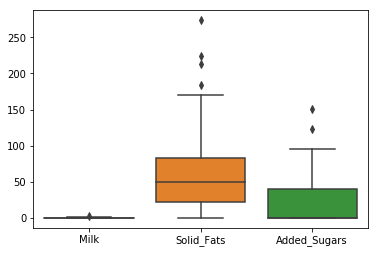

In [43]:
#Create a box plot of the three variables
sns.boxplot(data=df5)

Conclusion: Solid fats are the largest component of these dairy foods.  This is due to the presence of cream in ice-cream and cheese foods which are the largest portion of the foods listed. Added sugars are also contributed by the ice-cream products.  

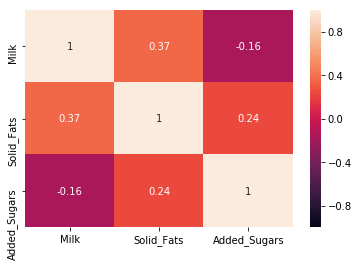

In [45]:
#show correlation of three variables via heatmap
corr = df5.corr()

sns.heatmap(corr, vmin=-1, annot=True)

Conclusion: Above heatmap confirms the ratios of the three factors. Consuming these dairy products will result in caloric intake from these sources in these ratios.